In [1]:
import numpy as np
import xlrd 
from numpy import exp,sqrt
path = u'места.xlsx' # имя и путь к файлу
wb = xlrd.open_workbook(path) # открываем файл и передаём его как объект в wb

''' Методы sheet_names показывает список имён доступных для работы листов файла'''

sheets = wb.sheet_names()


''' Передаём первый (и едиственный в данном случае) лист как объект sh '''
sh = wb.sheet_by_name(sheets[0])

In [2]:
#print ('Sheet name:', sheets)

In [3]:
n = sh.nrows
print ('количество узлов', n)

количество узлов 10


In [4]:
X = sh.col_values(1) # Важно передать именно values. Иначе* будет передан список из особого класса ячеек Cells
Y = sh.col_values(2)
#name_node = sh.col_values(0)

In [5]:
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = fig.add_subplot(111)
plt.title('Исходные данные. \n Количество узлов -%i.' %(n))
plt.plot(X, Y, color='r', linestyle=' ', marker='o')
#plt.text(X, Y, '11' , fontsize=14 )
plt.grid(True)
plt.show()

TypeError: float() argument must be a string or a number, not 'list'

<Figure size 432x288 with 1 Axes>

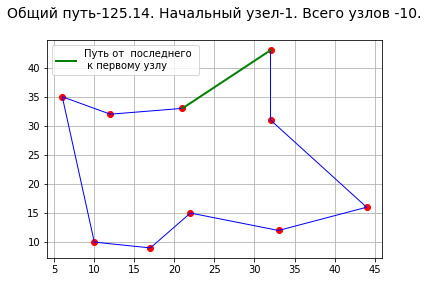

In [6]:
way=[]
RS=[];RW=[];RIB=[]
s=[]
for ib in np.arange(0,n,1):
         M = np.zeros([n,n])  # Шаблон матрицы относительных расстояний между пунктами
         for i in np.arange(0,n,1):
                  for j in np.arange(0,n,1):
                           if i!=j:
                                    M[i,j]=sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2)
                           else:
                                    M[i,j]=float('inf') # Заполнение матрицы
         way=[]
         way.append(ib)
         for i in np.arange(1,n,1):
                  s=[]
                  for j in np.arange(0,n,1):                  
                           s.append(M[way[i-1],j])
                  way.append(s.index(min(s)))
                  for j in np.arange(0,i,1):
                           M[way[i],way[j]]=float('inf')
                           M[way[i],way[j]]=float('inf')         
         S=sum([sqrt((X[way[i]]-X[way[i+1]])**2+(Y[way[i]]-Y[way[i+1]])**2) for i in np.arange(0,n-1,1)])+ sqrt((X[way[n-1]]-X[way[0]])**2+(Y[way[n-1]]-Y[way[0]])**2)                      
         RS.append(S)
         RW.append(way)
         RIB.append(ib)
S=min(RS)
way=RW[RS.index(min(RS))]
ib=RIB[RS.index(min(RS))]       
X1=[X[way[i]] for i in np.arange(0,n,1)]
Y1=[Y[way[i]] for i in np.arange(0,n,1)]
plt.title('Общий путь-%s. Начальный узел-%i. Всего узлов -%i.\n'%(round(S,2),ib,n), size=14)
plt.plot(X1, Y1, color='r', linestyle=' ', marker='o')
plt.plot(X1, Y1, color='b', linewidth=1)   
X2=[X[way[n-1]],X[way[0]]]
Y2=[Y[way[n-1]],Y[way[0]]]
plt.plot(X2, Y2, color='g', linewidth=2,  linestyle='-', label='Путь от  последнего \n к первому узлу')
plt.legend(loc='best')
plt.grid(True)
plt.savefig('результат', fmt='pdf')
plt.show()  


In [9]:
np.savetxt( 'результат.txt', way, fmt = '%1.0d')